In [1]:
from array import array
from math import sin,cos,pi,ceil
import numpy as np

def planMotion(startingPosition,orientation,velocity,simTime,samplingTime):
    theta = orientation 
    T = simTime
    v = velocity
    t = samplingTime
    
    S = v*simTime
    distX = sin(theta*pi/180)*S
    distY = cos(theta*pi/180)*S
    nSteps = ceil(T/t)

    stepDistX = distX/nSteps
    stepDistY = distY/nSteps
    
    res = np.arange(4,nSteps)
    
    arrayTime = np.linspace(1, simTime, nSteps + 1)
    arrayX = np.linspace(startingPosition[0], distX, nSteps + 1 )
    arrayY = np.linspace(startingPosition[1], distY, nSteps + 1)
    arrayV = velocity * np.ones(nSteps, dtype=np.int64)

    return np.concatenate((arrayTime,arrayX,arrayY,arrayV))

motion = planMotion(np.array([1,1]),0,10,10,1)

print(motion)

[1.00e+00 1.90e+00 2.80e+00 3.70e+00 4.60e+00 5.50e+00 6.40e+00 7.30e+00
 8.20e+00 9.10e+00 1.00e+01 1.00e+00 9.00e-01 8.00e-01 7.00e-01 6.00e-01
 5.00e-01 4.00e-01 3.00e-01 2.00e-01 1.00e-01 0.00e+00 1.00e+00 1.09e+01
 2.08e+01 3.07e+01 4.06e+01 5.05e+01 6.04e+01 7.03e+01 8.02e+01 9.01e+01
 1.00e+02 1.00e+01 1.00e+01 1.00e+01 1.00e+01 1.00e+01 1.00e+01 1.00e+01
 1.00e+01 1.00e+01 1.00e+01]


In [38]:
a = np.linspace(1,2,10)
b = np.linspace(10,20,10)
c = np.concatenate([[a],[b]]).reshape(2,10)

print(c[1,1:10])

[11.11111111 12.22222222 13.33333333 14.44444444 15.55555556 16.66666667
 17.77777778 18.88888889 20.        ]


In [39]:

from ctypes import Array
from dataclasses import dataclass
from typing import Dict, List

@dataclass
class SimulationOutput(object):
    egoTrajectory: List
    objectTrajectory: List
    simTime: float
    otherParams: Dict
    pass

from cmath import pi, sin
from math import cos
import numpy 
import numpy.linalg as nplg

class DummySimulator(object):
    samplingTime = 1
    @staticmethod
    def simulate(vars, simTime: float, samplingTime=samplingTime) -> SimulationOutput:

        egoInitialVelocity = vars[3]
        pedInitialVelocity = vars[7]

        egoTrajectory = planMotion(vars[0:3],simTime,samplingTime)
        objectTrajectory = planMotion(vars[4:7],simTime,samplingTime)

        colpoint = intersect(egoTrajectory,objectTrajectory)
                                     
        dist_ego_colpoint = nplg.norm(colpoint - egoTrajectory[1:2,0])
        dist_ped_colpoint = nplg.norm(colpoint - objectTrajectory[1:2,0])
        
        t_col_ego = dist_ego_colpoint/egoInitialVelocity
        t_col_ped = dist_ped_colpoint/pedInitialVelocity
        
        # collision occurs when both objects reach line crossing at
        # the same time (with some tolerance)
        
        t_tolerance = 5; #time tolerance for missed collision  

        otherparams = {}
        if  (colpoint!=[]) and (t_col_ego - t_col_ped) < t_tolerance:
            otherparams['isCollision'] = True
        else:
            otherparams['isCollision'] = False
        
        return SimulationOutput(simTime,egoTrajectory=egoTrajectory,objectTrajectory=objectTrajectory, otherParams=None)

In [40]:
import numpy as np
def intersect(x,y):
    return np.array([])

critical :61
not critical :34
|--- feature_6 <= 7.37
|   |--- class: True
|--- feature_6 >  7.37
|   |--- feature_2 <= 11.19
|   |   |--- class: True
|   |--- feature_2 >  11.19
|   |   |--- class: False

n_nodes: 5
child left : [ 1 -1  3 -1 -1]
child right : [ 2 -1  4 -1 -1]
feature: [ 6 -2  2 -2 -2]
threshold: [ 7.37233782 -2.         11.18811369 -2.         -2.        ]
n_node_samples: [95 19 76 30 46]
values: [[[34. 61.]]

 [[ 0. 19.]]

 [[34. 42.]]

 [[ 7. 23.]]

 [[27. 19.]]]


TypeError: can only concatenate str (not "list") to str

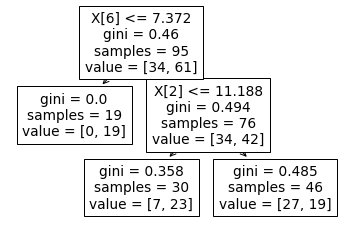

In [8]:
from sklearn import tree
import numpy as np

x_all= np.array([[0.0, 0, 14.553642627229703, 9.995321824442247, 100, 100.0, 10.71695905648141, 9], [0.0, 0, 14.553642627229703, 9.995321824442247, 100, 100.0, 10.71695905648141, 
9], [0, 0.0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0.0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0.0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0, 11.314741488997434, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0.0, 0, 11.060946961337898, 8.749895922832046, 100, 100, 8.010503272417804, 8.108287779565591], [0, 0.0, 11.331858537248122, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0.0, 11.331858537248122, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0, 0.0, 11.336518227537873, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0.0, 0, 17.951792282304936, 7.815317802031998, 
100.0, 100, 14.213078789868536, 6.935971082880489], [0.0, 0, 11.339580489908437, 8.749895922832046, 100.0, 100, 7.990739606159032, 8.058016548629254], [0, 0, 18.097685073860927, 7.8501673628645445, 100, 100, 14.260373844891019, 6.961193681863563], [0, 0, 18.097685073860927, 7.8501673628645445, 100, 100, 14.260373844891019, 6.961193681863563], [0, 0.0, 11.322399120529253, 8.915237700604644, 100.0, 100, 7.313837274837621, 8.08598632001306], [0.0, 0.0, 16.758611580678096, 8.453522648638629, 100, 100, 14.964024016500826, 8], [0.0, 0.0, 16.758611580678096, 8.453522648638629, 100, 100, 14.964024016500826, 8], [0.0, 0.0, 16.758611580678096, 8.453522648638629, 100, 100, 14.964024016500826, 8], [0.0, 0.0, 16.758611580678096, 8.453522648638629, 100, 100, 14.964024016500826, 8], [0.0, 0.0, 16.758611580678096, 8.453522648638629, 100, 100, 14.964024016500826, 8], [0, 0.0, 11.336518227537873, 8.91309094103487, 100, 100.0, 2.2416107578079236, 7.299491730793576], [0.0, 0, 11, 8.756355924289885, 100.0, 100, 7.497194777599334, 8.058016548629254], [0.0, 0, 18.097685073860927, 7.8501673628645445, 100.0, 100, 14.260373844891019, 6.977887663810403], [0.0, 0, 8.879220624550664, 10, 100, 100, 8, 9.802006687658363], [0, 0, 8.879220624550664, 10, 100, 100, 8, 9.802006687658363], [0, 0, 8.879220624550664, 10, 
100, 100, 8, 9.802006687658363], [0, 0, 8.879220624550664, 10, 100, 100, 8, 9.802006687658363], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.277720900701478, 6.947810507458068], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.260373844891019, 6.9243684966476975], [0, 0.0, 11.326258103327088, 8.920055043734283, 100.0, 100.0, 2.0954861071622135, 7.295773816330227], [0, 0.0, 11.326258103327088, 8.920055043734283, 100.0, 100.0, 2.0954861071622135, 7.295773816330227], [0, 0, 17.93159165636584, 7.8240664063167005, 100.0, 100, 14.260373844891019, 6.9243684966476975], [0.0, 0.0, 16.88884971197968, 8.418426684360714, 100, 100.0, 15.51178403918848, 8.072002516013757], [0, 0.0, 9.617579761415888, 8.515260426120374, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 9.617579761415888, 8.515260426120374, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 9.617579761415888, 8.515260426120374, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 9.617579761415888, 8.515260426120374, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.510471945065626, 8.088236593117802], [0, 0.0, 11, 8.749895922832046, 100.0, 100.0, 7.431201777013275, 8.055328701253728], [0.0, 0, 11, 8.751544940833105, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.751544940833105, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.751544940833105, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0.0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 
11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 
0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], 
[0, 0, 11, 8.749895922832046, 100, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.058016548629254], [0, 0.0, 11.018153408462291, 8.920055043734283, 100.0, 100.0, 2.1723174895760087, 7.292679251110027], [0, 0.0, 16.82951021571378, 8.419150566127016, 100.0, 100, 
15.2892614901053, 8.05626187756637], [0, 0, 16.82951021571378, 8.419150566127016, 100, 100, 15.2892614901053, 8.05626187756637], [0, 0, 16.82951021571378, 8.419150566127016, 100, 100, 15.2892614901053, 8.05626187756637], [0, 0, 16.82951021571378, 8.419150566127016, 100, 100, 15.2892614901053, 8.05626187756637], [0.0, 0, 11, 
8.751544940833105, 100.0, 100, 7.431201777013275, 8.002001396869389], [0.0, 0, 17.9449759208411, 7.806956244798677, 100.0, 100, 14.141994618677092, 6.947667619321854], [0.0, 0, 11, 8.749895922832046, 100.0, 100, 7.431201777013275, 8.063608125683471], [0.0, 0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.43083871103568, 8.069011444751274], [0.0, 0.0, 9, 10, 100.0, 100.0, 8, 9.802006687658363], [0.0, 0.0, 9, 10, 100.0, 100, 8, 9.802006687658363], [0.0, 0.0, 9, 10, 100.0, 100, 8, 9.802006687658363], [0.0, 0.0, 9, 10, 100.0, 100, 8, 9.802006687658363], [0.0, 0, 9, 10, 100.0, 100, 8, 9.802006687658363], [0, 0, 11.332573546204557, 8.749895922832046, 100, 100.0, 7.431201777013275, 7.994408422945782], [0.0, 0, 17.9449759208411, 7.806956244798677, 100.0, 100, 14.260373844891019, 6.977887663810403], [0, 0, 11.332573546204557, 8.749895922832046, 100.0, 100.0, 7.431201777013275, 8], [0.0, 0.0, 11.315279978451642, 8.739829820469623, 100.0, 100, 7.431201777013275, 7.999379039006158], [0.0, 0, 17.9449759208411, 7.7652620307605735, 100.0, 100, 14.39991243061521, 6.977887663810403], [0.0, 0.0, 16.871572520786565, 8.418426684360714, 100.0, 100.0, 15.60406607934475, 8.072002516013757], [0.0, 0.0, 16.871572520786565, 8.418426684360714, 100, 100.0, 15.60406607934475, 8.072002516013757], [0.0, 0.0, 16.871572520786565, 8.418426684360714, 100.0, 100.0, 15.60406607934475, 8.072002516013757], [0.0, 0, 18.097685073860927, 7.8501673628645445, 100.0, 100, 14.260373844891019, 6.994304513017549], [0.0, 0, 18.097685073860927, 7.8501673628645445, 100.0, 100, 14.260373844891019, 6.994304513017549], [0.0, 0, 14.290039769121508, 
10.000186487751078, 100, 100.0, 10.66679183188162, 9], [0.0, 0, 18.09985626722647, 7.8501673628645445, 100.0, 100, 14.260373844891019, 6.897641121586547], [0.0, 0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.71695905648141, 9], [0, 0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.71695905648141, 9], [0.0, 0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.714127569679338, 9.002230929478712], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15.008779836904221, 7.98668749091981], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15.008779836904221, 7.98668749091981], [0.0, 0.0, 16.766116896340645, 8.419843103483688, 100.0, 100, 14.964320293971388, 8], [0.0, 0, 16.766116896340645, 8.419843103483688, 100.0, 100, 14.964320293971388, 8], [0.0, 0.0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.43083871103568, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.43083871103568, 8.058016548629254], [0.0, 0, 11.322316664525838, 8.91311907257574, 100.0, 100, 7.43083871103568, 8.058016548629254], [0.0, 0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.43083871103568, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.43083871103568, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.43083871103568, 8.058016548629254], [0.0, 0, 11.322316664525838, 8.91311907257574, 100.0, 100, 7.43083871103568, 8.058016548629254], [0, 0.0, 11.336518227537873, 8.920055043734283, 100, 100.0, 1.951842242473814, 7.299491730793576], [0, 0.0, 11.322316664525838, 8.915284548652819, 100.0, 100, 7.372187988600633, 8.058016548629254], [0.0, 0.0, 11.328344894812588, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.328344894812588, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.91311907257574, 100.0, 100.0, 7.445774802807812, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.91311907257574, 100, 100.0, 7.445774802807812, 8.058016548629254], [0, 0, 11.322529684618829, 8.915237700604644, 100.0, 100, 7.390082582410978, 8.058016548629254], [0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100, 7.390322795247474, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100.0, 7.392092718935336, 8.058016548629254], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100, 100.0, 7.315607198525482, 8.058016548629254], [0, 0.0, 11.322316664525838, 8.915237700604644, 100.0, 100, 7.313837274837621, 8.058016548629254], [0, 0.0, 11.315158498131346, 8.91311907257574, 100.0, 100.0, 7.445774802807812, 8.058016548629254], [0, 0.0, 11.315158498131346, 8.91311907257574, 100.0, 100.0, 7.445774802807812, 8.058016548629254], [0, 0.0, 11.315158498131346, 8.91311907257574, 100.0, 100, 7.445774802807812, 8.058016548629254], [0, 0.0, 11.314945478038354, 8.91311907257574, 100.0, 100.0, 7.446015015644308, 8.058016548629254], [0, 0, 17.9449759208411, 7.824376797354091, 100, 100, 14.260612164526638, 6.974259038752214], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.260373844891019, 6.97407540769079], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.260373844891019, 6.97407540769079], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.260373844891019, 6.97407540769079], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.260373844891019, 6.97407540769079], [0.0, 0.0, 11.322316664525838, 8.915237700604644, 100, 100, 7.315607198525482, 8.056858245808007], [0.0, 0.0, 11.916818527302748, 7.614313731925961, 100.0, 100.0, 7.090859900093019, 6.749112372308176], [0.0, 0.0, 11.916818527302748, 7.614313731925961, 100.0, 100.0, 7.090859900093019, 6.749112372308176], [0.0, 0.0, 11.916818527302748, 7.614313731925961, 100.0, 100.0, 7.090859900093019, 6.749112372308176], [0.0, 0.0, 11.916818527302748, 7.614313731925961, 100.0, 100.0, 7.090859900093019, 6.749112372308176], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.277720900701478, 6.97407540769079], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.277720900701478, 6.97407540769079], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.277720900701478, 6.97407540769079], [0.0, 0.0, 11.370769521411798, 8.915237700604644, 100, 100.0, 7.502147171085602, 8.058016548629254], [0.0, 0.0, 11.370769521411798, 8.915237700604644, 100, 
100.0, 7.502147171085602, 8.058016548629254], [0.0, 0.0, 11.370769521411798, 8.915237700604644, 100, 100, 7.502147171085602, 8.058016548629254], [0.0, 0.0, 11.370769521411798, 8.915237700604644, 100, 100.0, 7.502147171085602, 8.058016548629254], [0.0, 0.0, 11.370769521411798, 8.915237700604644, 100, 100.0, 7.502147171085602, 8.058016548629254], [0.0, 0.0, 11.370769521411798, 8.915237700604644, 100, 100, 7.502147171085602, 8.058016548629254], [0, 0, 17.9449759208411, 7.8240664063167005, 100.0, 100, 14.283816052198727, 6.97407540769079], [0.0, 0, 11.322316664525838, 8.915237700604644, 100, 100.0, 7.318438685327554, 8.055785619149985], [0.0, 0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.757089144092074, 9], [0.0, 0.0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.757617244755409, 9], [0.0, 0.0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.757617244755409, 9], [0.0, 0.0, 14.595364170319638, 10.060759526786166, 100.0, 100.0, 10.757617244755409, 9], [0.0, 0.0, 14.595364170319638, 10.060759526786166, 100.0, 100, 10.757617244755409, 9], [0.0, 0, 11.322316664525838, 8.91311907257574, 100, 100, 7.178271134497858, 8.058016548629254], [0.0, 0, 11.322316664525838, 8.91311907257574, 100, 100, 7.178271134497858, 8.058016548629254], [0.0, 0.0, 16.871572520786565, 8.42153095886869, 100.0, 100.0, 15, 7.991884918515932], [0.0, 0.0, 16.871572520786565, 8.42153095886869, 100.0, 100, 15, 7.991884918515932], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 16.871572520786565, 8.42150581272027, 100.0, 100.0, 15, 7.99208628030355], [0.0, 0.0, 9.668124524140762, 8.548946791488184, 100.0, 100.0, 5, 7.6424202900179585], [0, 0, 9.668124524140762, 8.548946791488184, 100.0, 100.0, 5, 7.6424202900179585], [0.0, 0.0, 9.668124524140762, 8.548946791488184, 100.0, 100.0, 5, 7.6424202900179585], [0, 0, 9.668124524140762, 8.548946791488184, 100.0, 100.0, 5, 7.6424202900179585], [0.0, 0.0, 9.668124524140762, 8.548946791488184, 100, 100.0, 5, 7.6424202900179585], [0, 0, 11.626666220104108, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0.0, 0.0, 16.649949456704814, 8.418426684360714, 100.0, 100, 15, 8.057107998620658], [0, 0.0, 16.649949456704814, 8.418426684360714, 100.0, 100, 15, 8.057107998620658], [0, 0.0, 11.629887220907722, 8.920055043734283, 100.0, 100, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.629887220907722, 8.920055043734283, 100, 100, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.629887220907722, 8.920055043734283, 100, 100, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.315158498131346, 8.920083175275153, 100.0, 100.0, 7.445774802807812, 8.058016548629254], [0, 0.0, 11.315158498131346, 8.920083175275153, 100.0, 100.0, 7.445774802807812, 8.058016548629254], [0.0, 0.0, 16.871572520786565, 8.418512764665083, 100.0, 100.0, 15.014613878741358, 7.991884918515932], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.286578648499079], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.286578648499079], [0, 0.0, 11.643783268354795, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.291607977288911], [0, 0.0, 11.643783268354795, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.291607977288911], [0, 0.0, 11.643783268354795, 8.918406025733224, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.918406025733224, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 
100, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 
11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100, 100, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 
100, 2.2416107578079236, 7.292679251110027], [0, 0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027], [0, 0.0, 11.643783268354795, 8.920055043734283, 100.0, 100.0, 2.2416107578079236, 7.292679251110027]])

y_all = np.array([True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, 
True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False])

X = x_all[:95]
y = y_all[:95]

critical = y[y == True]

var_min = [ 0, 0, 0,1, 100, 100, 0,5]
var_max = [ 0, 0, 20, 50, 100, 100,20,10]

print("critical :" + str(len(critical)))
print("not critical :" + str(len(X) - len(critical)))

clf = tree.DecisionTreeClassifier(min_samples_split=75)
clf = clf.fit(X, y)

tree.plot_tree(clf)

r = tree.export_text(clf)
print(r)

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
n_node_samples= clf.tree_.n_node_samples
values= clf.tree_.value


print("n_nodes: "+ str(n_nodes))
print("child left : " + str(children_left))
print("child right : " +str(children_right))
print("feature: "+ str(feature))
print("threshold: "+ str(threshold))
print("n_node_samples: "+ str(n_node_samples))
print("values: " + str(values))


leafs = []
prediction = clf.predict([[0,0,0,0,0,0,0,0]])

#print(prediction)

# node_indicator = clf.decision_path(X)

classResults = clf.apply(X)

def ind_in_node(node_id,classResults, pop):
    inds = []
    for i in range(0,len(classResults)):
        if classResults[i] == node_id:
            inds.append(pop[i])
    return inds

ind_s_in_node = ind_in_node(0,classResults=classResults,pop=x_all)

print("ind_s in node:" + str(ind_s_in_node))

print(classResults)

In [3]:
array = [2,2,3]

for i in range(0,len(array)):
    print(i)

0
1
2


In [4]:
import math

def findNextDivident(n,k):
    i = 1
    v = k
    while v < n:
        v = k*i
        i = i + 1
    return v

print(findNextDivident(37,4))

64.0


{1: 0, 3: 2, 2: 0, 4: 2}


In [5]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True
print(is_leaves)




[False  True False  True  True]


In [6]:
leafsLib = {}
criticalReg = []

CP = 0.6

indCrit = 1
indNotCri = 0
for i in range(0,n_nodes):
    # print(node.get_label())
    # print(node.get_name())
    if  is_leaves[i]:
        valuesNodeI = values[i][0]
        leafsLib[i] = {"critical" : 0, "notCritical" : 0}
        leafsLib[i]["critical"]= valuesNodeI[indCrit]
        leafsLib[i]["notCritical"] = valuesNodeI[indNotCri]
        if(valuesNodeI[indCrit]/(valuesNodeI[indCrit] +valuesNodeI[indNotCri]) > CP):
            criticalReg.append(i)

print(leafsLib)
print(criticalReg)

[]




{1: {'critical': 19.0, 'notCritical': 0.0}, 3: {'critical': 23.0, 'notCritical': 7.0}, 4: {'critical': 19.0, 'notCritical': 27.0}}
[1, 3]


[]

In [12]:
import numpy as np
import copy

classResults_np = np.array(classResults)
node_indicator = clf.decision_path(X)

def getParentsTree(ch_left, ch_right):
    result = {}
    for i in range(0,len(ch_left)):
        if(ch_left[i]!=-1):
            result[ch_left[i]] = i

    for i in range(0,len(ch_right)):
        if(ch_right[i]!=-1):
            result[ch_right[i]] = i
    return result

parents = getParentsTree(children_left,children_right)

print(parents)

def getPredecessors(node_id):
    result = []
    node = node_id
    while node != 0:
        result.append(parents[node])
        node = parents[node]
    return result

var_min = [ 0, 0, 0,1, 100, 100, 0,5]
var_max = [ 0, 0, 20, 50, 100, 100,20,10]

# get features from critical regions to explore regions
bounds= []
delta = 0.001


for i in criticalReg:
    #sample in class i 
    upperReg = copy.deepcopy(var_max)
    lowerReg = copy.deepcopy(var_min)

    # if(i in children_left):
    #     upperReg[feature[i]] = threshold[i]
    #     print("at: "+ str(i))
    #     print("feature {} <= {}".format(feature[i],threshold[i]))

    # else:
    #     lowerReg[feature[i]] = threshold[i] + delta
    #     print("at: "+ str(i))
    #     print("feature {} > {}".format(feature[i],threshold[i]))


    for j in getPredecessors(i):
        if(j in children_left and j == 0 ):
            upperReg[feature[j]] = threshold[j]
            print("at: "+ str(j))

            print("feature {} <= {}".format(feature[j],threshold[j]))
        else:
            lowerReg[feature[j]] = threshold[j] + delta
            print("at: "+ str(j))
            print("feature {} > {}".format(feature[j],threshold[j]))


    bounds.append((lowerReg,upperReg))

print("n cr regions:" + str(len(criticalReg)))

for i in range(0,len(bounds)):
    print("bound for region {} is {}".format(i,bounds[i]))



{1: 0, 3: 2, 2: 0, 4: 2}
at: 0
feature 6 > 7.372337818145752
at: 2
feature 2 > 11.188113689422607
at: 0
feature 6 > 7.372337818145752
n cr regions:2
[0, 0, 0, 1, 100, 100, 0, 5]
[0, 0, 20, 50, 100, 100, 20, 10]
bound for region 0 is ([0, 0, 0, 1, 100, 100, 7.373337818145752, 5], [0, 0, 20, 50, 100, 100, 20, 10])
bound for region 1 is ([0, 0, 11.189113689422607, 1, 100, 100, 7.373337818145752, 5], [0, 0, 20, 50, 100, 100, 20, 10])


In [2]:
import os

#CURRENT_DIR = os.path.dirname(os.path.abspath(__file__))
CURRENT_DIR = os.path.abspath(os.getcwd())

In [23]:

import pydotplus  
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf(CURRENT_DIR + "dt_test.pdf")  

nodes = graph.get_node_list()



In [1]:
a  = [i for i in range(1,100)]
print(a[3::2])

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [5]:
path = "/dsfdsf/file.txt"

print(path.split("."))


['/dsfdsf/file', 'txt']
